In [55]:
using BSON: @load
using DeepQLearning
using Flux
using Random
using AutoViz
using Statistics
# using Plotly

include("lane_change_mdp.jl")

policy_fname = "policy20.bson"
@load policy_fname policy 

# num_collisions = 0
# num_reached = 0
# num_timeouts = 0
# scene_vec_sum = 0.
# for i = 1:1000
#     mdp = laneChangeMDP()
#     scene_vec, collided, goal_reached = simulate(mdp, policy)
#     if collided
#         num_collisions += 1
#     elseif goal_reached
#         num_reached += 1
#         scene_vec_sum += length(scene_vec)
#     else
#         num_timeouts += 1
#     end
# end

# avg_time = scene_vec_sum / num_reached

# @show num_collisions, num_reached, avg_time, num_timeouts




mdp = laneChangeMDP()
scene_vec, collided, reward_earned = simulate(mdp, policy)
@show reward_earned



reward_earned = true


true

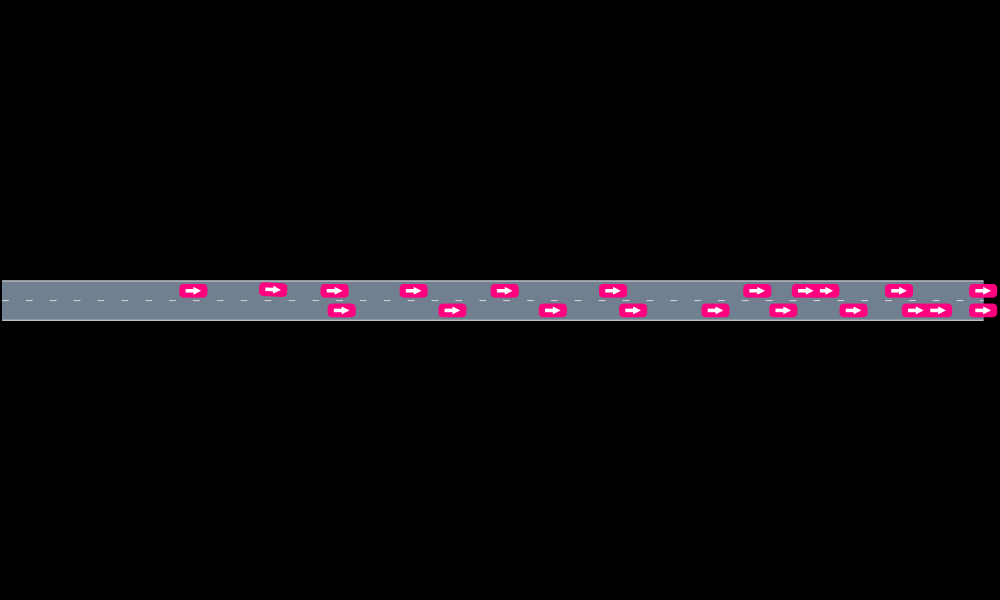

In [56]:
cam = FitToContentCamera(0.005)
render(scene_vec[end], mdp.env.roadway, cam=cam)

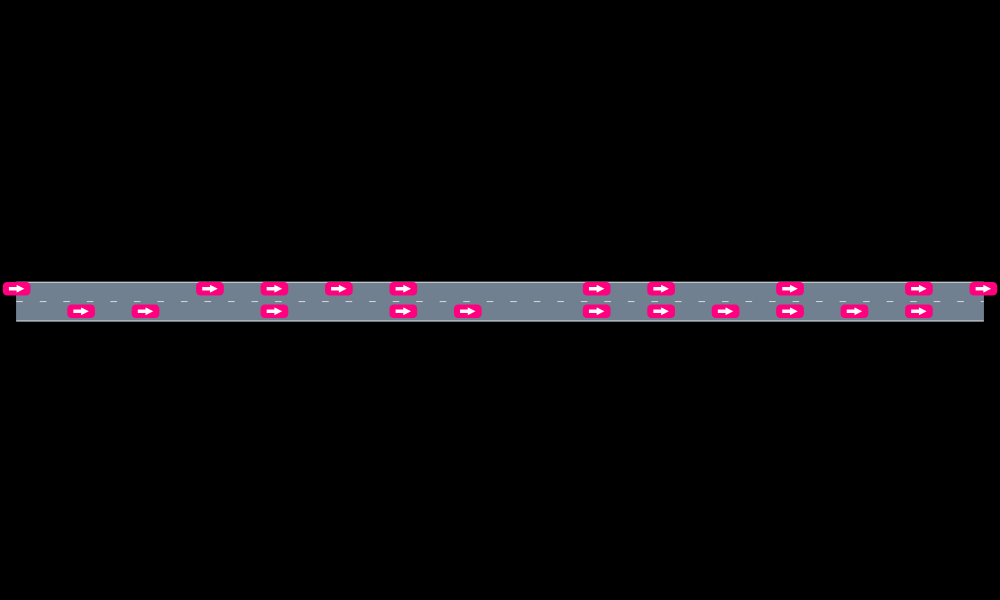

In [57]:
# cam = FitToContentCamera(0.005)
cam = StaticCamera(VecE2(140.0,0.0), 3.0)#4.75)
render(scene_vec[1], mdp.env.roadway, cam=FitToContentCamera(0.005))

In [58]:
using Reel
function animate_record(scenes::Vector{Scene},dt::Float64, roadway::Roadway{Float64}, cam=FitToContentCamera(0.0))
    duration =length(scenes)*dt::Float64
    fps = Int(1/dt)
    function render_rec(t, dt)
        frame_index = Int(floor(t/dt)) + 1
        return render(scenes[frame_index], roadway, cam=cam)
    end
    return duration, fps, render_rec
end

animate_record (generic function with 2 methods)

In [59]:
duration, fps, render_hist = animate_record(scene_vec, mdp.timestep, mdp.env.roadway, FitToContentCamera(0.0))
film = roll(render_hist, fps = fps, duration = duration)
write("policy_test.mp4", film)

"policy_test.mp4"

"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"
"FALSE" = "FALSE"


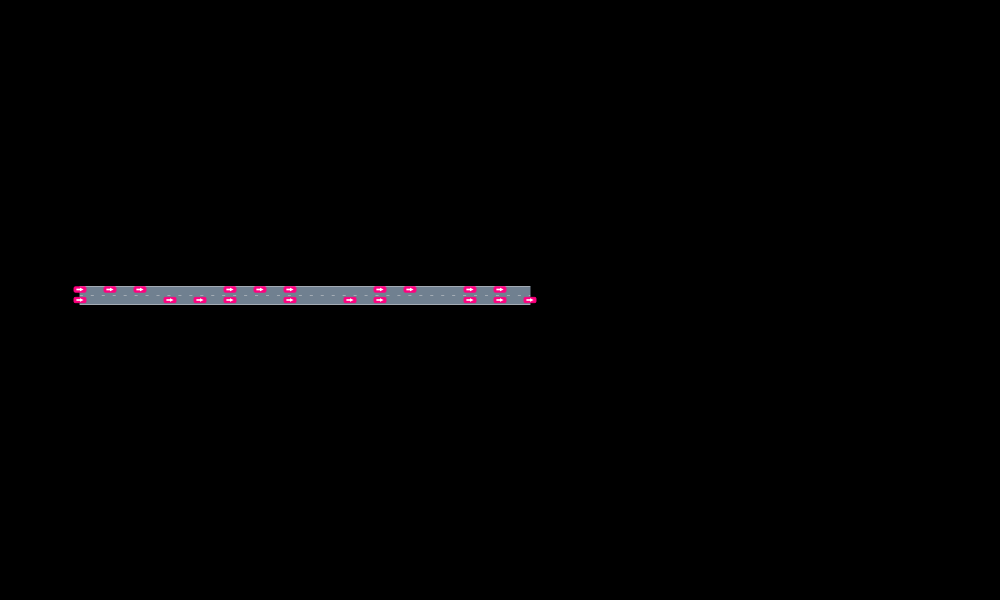

In [226]:
envi = laneChangeEnvironment()
populate_env!(envi.ncars, envi.nlanes, envi.road_length, envi.roadway, envi.scene)
render(envi.scene, envi.roadway, cam=cam)